## 함수 적용과 매핑

In [1]:
import pandas as pd
import numpy as np

In [6]:
frame = pd.DataFrame(np.arange(12).reshape(4,3), columns = list('dbe'),
                    index = ['Utah', 'Ohio', 'Texas','Oregon'])
frame

,d,b,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [8]:
np.sum(frame, axis=1)

d    18
b    22
e    26
dtype: int64

In [9]:
np.mean(frame, axis=0)

d    4.5
b    5.5
e    6.5
dtype: float64

In [10]:
np.abs(frame)

,d,b,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [11]:
frame.max()

d     9
b    10
e    11
dtype: int32

In [12]:
frame.min()

d    0
b    1
e    2
dtype: int32

In [13]:
frame.max()-frame.min()

d    9
b    9
e    9
dtype: int32

In [14]:
def f(x):
    return x.max()-x.min()

In [18]:
#lambda 함수 표현식
f = lambda x: x.max()-x.min()

In [19]:
#나만의 함수를 만들기
frame.apply(f)

d    9
b    9
e    9
dtype: int64

In [20]:
#행기준
frame.apply(f, axis="columns")

Utah      2
Ohio      2
Texas     2
Oregon    2
dtype: int64

In [21]:
frame

,d,b,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [26]:
format = lambda x: '%.2f'%x

In [27]:
frame.applymap(format) #applymap : DataFrame에 모든 원소에 적용할때

,d,b,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


In [28]:
sr = frame["b"]

In [29]:
sr.map(format) #map : Series의 모든 원소에 적용할 때

Utah       1.00
Ohio       4.00
Texas      7.00
Oregon    10.00
Name: b, dtype: object

### 실습

In [30]:
import seaborn as sns

In [31]:
titanic = sns.load_dataset('titanic')

- DafaFrame의 head 보기

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- age와 fare 열만 색인해서 DataFrame으로 만들기

In [34]:
sr = titanic[['age','fare']]
sr

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


- 각 열의 최대값과 최소값의 차이 구하기

In [36]:
def f(x):
    return x.max()-x.min()

In [ ]:
f = lambda x: x.max() - x.min()

In [47]:
sr.apply(f, axis=0)

age      79.5800
fare    512.3292
dtype: float64

In [51]:
#동일한 방식
sr.max(axis=0) - sr.min(axis=0)

age      79.5800
fare    512.3292
dtype: float64

- 모든 값의 포맷을 소수점 두자리로 맞추기

In [42]:
format = lambda x: '%.2f'%x

In [52]:
sr.applymap(format)

,age,fare
0,22.00,7.25
1,38.00,71.28
2,26.00,7.92
3,35.00,53.10
4,35.00,8.05
...,...,...
886,27.00,13.00
887,19.00,30.00
888,nan,23.45
889,26.00,30.00


- 누락된 값(NaN) 값이 있는지 Bool 값으로 확인하기

In [53]:
def missing_value(x):
  return x.isnull()

In [55]:
sr.apply(missing_value)

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,True,False
889,False,False


In [56]:
sr.isnull()

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,True,False
889,False,False


## 정렬과 순위

In [57]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj

d    0
a    1
b    2
c    3
dtype: int32

In [58]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

In [59]:
obj.sort_values()

d    0
a    1
b    2
c    3
dtype: int32

In [61]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4),
             index = ["three", "one"],
             columns = ["d", "a", "b", "c"])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [63]:
frame.sort_index(axis=1) #열인덱스 정렬

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [64]:
frame.sort_index(axis=0, ascending = False) #행인덱스 정렬

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [66]:
frame = pd.DataFrame({'b' :[4, 7, -3, 2], 'c':[0, 1, 0, 1]})
frame

,b,c
0,4,0
1,7,1
2,-3,0
3,2,1


In [67]:
frame.sort_values(by='b', axis=0)

,b,c
2,-3,0
3,2,1
0,4,0
1,7,1


In [68]:
#c와 d의 순으로 정렬
frame.sort_values(by=['c','b'])

,b,c
2,-3,0
0,4,0
3,2,1
1,7,1


### 실습

* 데이터프레임 정렬

In [69]:
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
# 내림차순으로 행 인덱스 정렬 

In [70]:
df.sort_index(axis=0,ascending=False)

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


In [ ]:
# c1 열을 기준으로 내림차순 정렬

In [72]:
df.sort_values(by='c1', ascending=False)

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


##  중복 색인

In [73]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [74]:
obj.index

Index(['a', 'a', 'b', 'b', 'c'], dtype='object')

In [75]:
obj.index.is_unique

False

In [76]:
obj["a"]

a    0
a    1
dtype: int32

In [77]:
obj["c"]

4

In [78]:
df = pd.DataFrame(np.random.randn(4,3), index=["a", "a", "b", "b"])
df

,0,1,2
a,-0.951571,-0.833944,0.907949
a,-1.130024,-0.448528,-0.926503
b,-0.622920,1.577346,1.572137
b,0.068102,0.182541,-0.180321


In [79]:
df.loc["b"]

,0,1,2
b,-0.622920,1.577346,1.572137
b,0.068102,0.182541,-0.180321


## 기술 통계 계산과 요약

In [80]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [83]:
df.sum(axis=1, skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [84]:
df.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

In [85]:
df.mean(axis="columns", skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
# np.argmax(), np.argmin() : 최대/최소값의 인덱스 (Numpy)
# df.idxmax(), df.idxmin() : 최대/최소값의 인덱스 (Pandas)

In [87]:
df.idxmax()# 각 열의 최대값의 인덱스

one    b
two    d
dtype: object

In [88]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [89]:
df.describe() #기술통계를 전체적으로 보여주는 모듈

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [90]:
obj = pd.Series(['a','a','b','c']*4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [91]:
obj.describe() #문자열의 집계치

count     16
unique     3
top        a
freq       8
dtype: object

#### 상관관계와 공분산

In [92]:
df = pd.DataFrame({"math":[50, 60, 40, 30, 70], "physics":[40, 60, 50, 20, 80]})

<AxesSubplot:xlabel='math', ylabel='physics'>

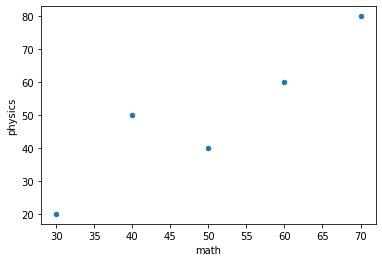

In [93]:
# 산포도(산점도)
df.plot(kind="scatter", x="math", y="physics")

In [94]:
# 상관계수
df.corr()

,math,physics
math,1.000000,0.919239
physics,0.919239,1.000000


#### 유일값, 값 세기, 멤버십

In [95]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [96]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [97]:
#컬럼내에서 값을 카운트해주는 메서드
pd.value_counts(obj)

c    3
a    3
b    2
d    1
dtype: int64

In [98]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data


,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [99]:
data["Qu1"].value_counts()

3    2
4    2
1    1
Name: Qu1, dtype: int64

## 데이터 로딩과 저장

In [101]:
df =pd.read_csv('examples/ex1.csv')

In [102]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [103]:
pd.read_table('examples/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [106]:
df = pd.read_csv('examples/ex2.csv', header=None)

In [107]:
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [108]:
df.to_csv('examples/out.csv')